In [90]:
import numpy as np
import cv2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from sklearn.model_selection import GridSearchCV

print("Digits NN")

Digits NN


# Dataset

In [2]:
# Dataset

# Each row has an image!
# There are 2000 images, 200 for each digit.
datasetDigits = np.loadtxt('mfeat-pix.txt')

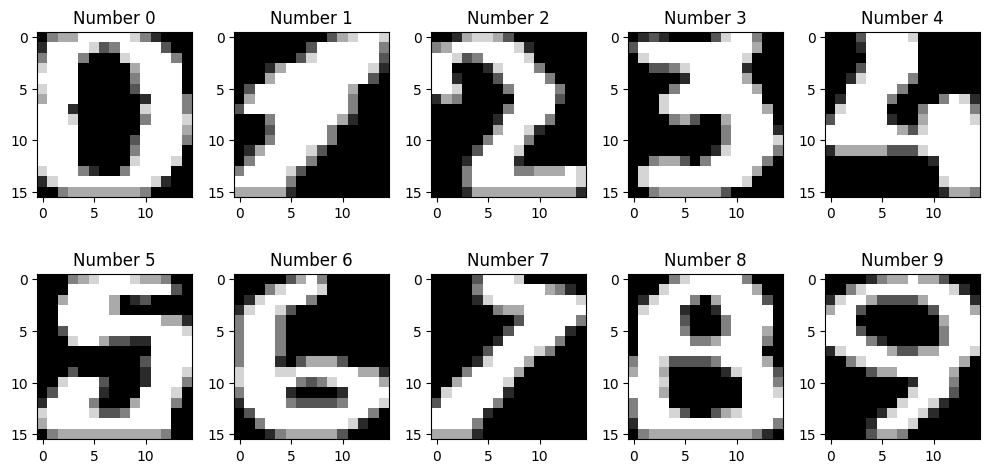

In [3]:
# Visualize the data!
def get_digit_image(data, digit):
    #Gets the first image of the digit
    return datasetDigits[digit * 200].reshape(16, 15) # 16x15 -> height vs width

plt.figure(figsize=(10, 5))
for digit in range(10):
    plt.subplot(2, 5, digit + 1)
    image = get_digit_image(datasetDigits, digit)
    plt.imshow(image, cmap='gray',vmin=0, vmax=6) # images in grayscale from 1 to 6
    plt.title(f'Number {digit}')

plt.tight_layout()
plt.show()

# Pre-processing

In [4]:
# Creating the labels
dataLabels = np.array([i // 200 for i in range(datasetDigits.shape[0])])

In [5]:
# Normalize the data
scaler = MinMaxScaler()
dataPreProcessed = scaler.fit_transform(datasetDigits)
dataPreProcessed

array([[0.        , 0.5       , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16666667, ..., 0.5       , 0.25      ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ]])

# Training

1. gen1 MLP neural network was chosen following basic tests:
    1. 2 layers, 240 neurons
    2. alpha = 0.0001
    3. activation = relu
    4. early_stopping = False
    - Training Accuracy: 100.00%
    - Test Accuracy: 97.55%
2. gen2 came to life running a search for the best architecture:
    1. 8 layers, 260 neurons
    2. alpha = 0.0001
    3. activation = relu
    4. early_stopping = False
    - Training Accuracy: 99.98%
    - Test Accuracy: 97.85%
3. gen3 obtainded through a hyperparameters search:
    1. 8 layers, 260 neurons
    2. alpha = 0.003430469286314919
    3. activation = relu
    4. early_stopping = False
    - Training Accuracy: 99.98%
    - Test Accuracy: 98.05%

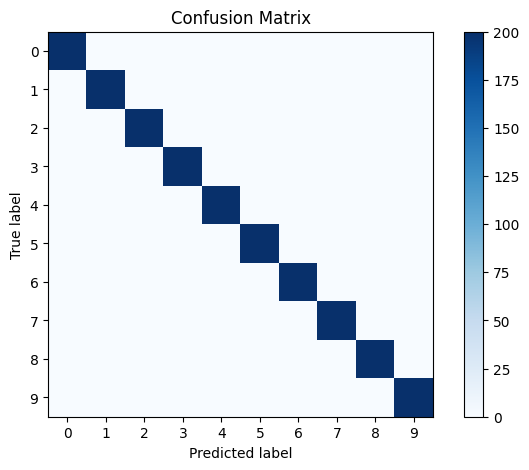

In [ ]:
# Initialize the neural network regressor [multilayer perceptron (MLP)]
mlp = MLPClassifier(hidden_layer_sizes=(260,260,260,260,260,260,260,260), # architecture
                   early_stopping=False, # early stopping
                   activation='relu', # Activation function
                   solver='adam', # Optimization algorithm
                   max_iter=1000, # Max number of iterations
                   alpha=0.003430469286314919,
                   random_state=42,
                   warm_start=True,
                   verbose=False)
                   #Cross-Entropy is the loss function! It is also known as logarithmic loss (log loss).

# Fit the model to the training data
mlp.fit(dataPreProcessed, dataLabels)

# Making predictions on the test set
predicted = mlp.predict(dataPreProcessed)

# Display confusion matrix (Training Set)
conf_matrix = confusion_matrix(dataLabels, predicted)
plt.figure(figsize=(8, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Validation

Train Accuracy: ['100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '99.83%', '100.00%', '100.00%', '99.94%', '100.00%']
Test Accuracy: ['98.50%', '98.50%', '99.00%', '98.00%', '96.50%', '98.00%', '99.00%', '98.00%', '97.00%', '98.00%']
Mean Training Accuracy: 99.98%
Mean Test Accuracy: 98.05%


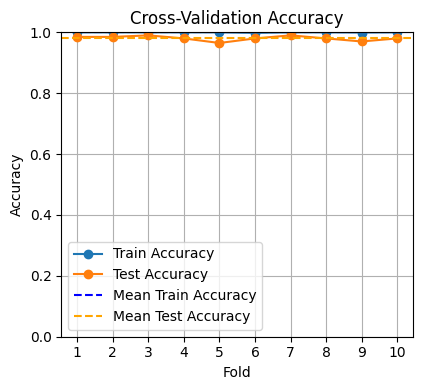

In [74]:
# k-fold cross-validation
k = 10

cv_results = cross_validate(mlp, dataPreProcessed, dataLabels, cv=k, n_jobs=-1, return_train_score=True, scoring=['accuracy'])

train_accuracy_formatted = [f"{acc * 100:.2f}%" for acc in cv_results['train_accuracy']]
test_accuracy_formatted = [f"{acc * 100:.2f}%" for acc in cv_results['test_accuracy']]
mean_train_accuracy = np.mean(cv_results['train_accuracy']) * 100
mean_test_accuracy = np.mean(cv_results['test_accuracy']) * 100

print("Train Accuracy:", train_accuracy_formatted)
print("Test Accuracy:", test_accuracy_formatted)
print(f"Mean Training Accuracy: {mean_train_accuracy:.2f}%")
print(f"Mean Test Accuracy: {mean_test_accuracy:.2f}%")

# Visual Results:
plt.figure(figsize=(8, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(cv_results['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(cv_results['test_accuracy'], label='Test Accuracy', marker='o')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(ticks=np.arange(k), labels=np.arange(1, k+1))
plt.ylim(0, 1)
plt.axhline(mean_train_accuracy / 100, color='blue', linestyle='--', label='Mean Train Accuracy')
plt.axhline(mean_test_accuracy / 100, color='orange', linestyle='--', label='Mean Test Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [92]:
# leave-one-out cross-validation

k = LeaveOneOut()

loo_results = cross_validate(mlp, dataPreProcessed, dataLabels, cv=k, n_jobs=-1, return_train_score=True, scoring=['accuracy'])

train_accuracy_formatted = [f"{acc * 100:.2f}%" for acc in loo_results['train_accuracy']]
test_accuracy_formatted = [f"{acc * 100:.2f}%" for acc in loo_results['test_accuracy']]
mean_train_accuracy = np.mean(loo_results['train_accuracy']) * 100
mean_test_accuracy = np.mean(loo_results['test_accuracy']) * 100

print("Train Accuracy:", train_accuracy_formatted)
print("Test Accuracy:", test_accuracy_formatted)
print(f"Mean Training Accuracy: {mean_train_accuracy:.2f}%")
print(f"Mean Test Accuracy: {mean_test_accuracy:.2f}%")

Python(57180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(57190) Malloc

Train Accuracy: ['100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '90.10%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '99.80%', '100.00%', '99.85%', '100.00%', '100.00%', '100.00%', '99.40%', '100.00%

# Regularization

### Model Structure

In [ ]:
# Define the model structure!
# Test different combinations of layers and number of neurons

results = []

def train_and_evaluate(nLayers, nNeurons, dataPreProcessed, dataLabels):
    layers = [nNeurons] * nLayers

    mlpI = MLPClassifier(
        hidden_layer_sizes=layers,
        early_stopping=False,
        activation='relu',
        solver='adam',
        alpha=0.0001,
        max_iter=1000,
        random_state=42,
        warm_start=True,
        verbose=False
    )

    mlpI_results = cross_validate(mlpI, dataPreProcessed, dataLabels, cv=10, n_jobs=-1, return_train_score=True, scoring=['accuracy'])

    mean_train_accuracyI = np.mean(mlpI_results['train_accuracy']) * 100
    mean_test_accuracyI = np.mean(mlpI_results['test_accuracy']) * 100

    print(f"nLayers: {nLayers}, nNeurons: {nNeurons}")
    print(f"Mean Training Accuracy: {mean_train_accuracyI:.2f}%")
    print(f"Mean Test Accuracy: {mean_test_accuracyI:.2f}%")

    return {
        'nLayers': nLayers,
        'nNeurons': nNeurons,
        'Mean Train Accuracy': mean_train_accuracyI,
        'Mean Test Accuracy': mean_test_accuracyI
    }

results = Parallel(n_jobs=-1)(
    delayed(train_and_evaluate)(nLayers, nNeurons, dataPreProcessed, dataLabels)
    for nLayers in range(1, 21)
    for nNeurons in range(120, 361, 10)
    )

In [26]:
# Transform the results into an excel sheet
resultsPandas = pd.DataFrame(results)
resultsPandas.to_excel('architecture_results.xlsx', index=False)
resultsPandas

,nLayers,nNeurons,Mean Train Accuracy,Mean Test Accuracy
0,1,120,100.000000,97.15
1,1,130,100.000000,97.55
2,1,140,100.000000,97.50
3,1,150,100.000000,97.30
4,1,160,100.000000,97.40
...,...,...,...,...
495,20,320,93.161111,89.70
496,20,330,94.616667,91.45
497,20,340,90.838889,86.95
498,20,350,91.450000,88.40


### Hyperparameters Optimization 

In [64]:
alpha_range = np.logspace(-4,0,100) #(100 values in the interval from 10^-4 to 1)

# Hyperparameters to be tested
param_grid = {
    'hidden_layer_sizes': [
        (230,230,230), 
        (160,160,160,160,160,160), 
        (250,250,250,250,250,250,250,250), 
        (260,260,260,260,260,260,260,260)
    ],  # Best architectures found
    'alpha': alpha_range, # L2 regularization term
    'activation': ['relu','tanh','logistic'], # Activation function
    'early_stopping': [True,False] # Early stopping
}

# Grid search CV uses k-fold cross-validation to evaluate the model with different hyperparameters
grid_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=1000), param_grid, cv=10, verbose=2, n_jobs=-1)

grid_search.fit(dataPreProcessed, dataLabels)

# Best parameters and score!
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Score: {grid_search.best_score_}")

Fitting 10 folds for each of 2400 candidates, totalling 24000 fits


Python(80764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80774) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(80778) Malloc

[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(230, 230, 230); total time=   2.7s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(230, 230, 230); total time=   3.3s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(230, 230, 230); total time=   3.5s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(230, 230, 230); total time=   3.6s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(230, 230, 230); total time=   3.6s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(230, 230, 230); total time=   3.7s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(230, 230, 230); total time=   3.6s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(230, 230, 230); total time=   3.6s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_laye

In [68]:
resultsPandas2 = pd.DataFrame(grid_search.cv_results_)
resultsPandas2.to_excel('hyperparameters_results.xlsx', index=False)
resultsPandas2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_early_stopping,param_hidden_layer_sizes,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.660665,0.549895,0.005933,0.002251,relu,0.0001,True,"(230, 230, 230)","{'activation': 'relu', 'alpha': 0.0001, 'early...",0.955,...,0.965,0.965,0.960,0.975,0.975,0.96,0.985,0.9700,0.010724,495
1,3.713118,0.703310,0.006437,0.002679,relu,0.0001,True,"(160, 160, 160, 160, 160, 160)","{'activation': 'relu', 'alpha': 0.0001, 'early...",0.970,...,0.965,0.960,0.950,0.940,0.975,0.96,0.985,0.9655,0.012738,1032
2,9.880061,1.526392,0.018184,0.002869,relu,0.0001,True,"(250, 250, 250, 250, 250, 250, 250, 250)","{'activation': 'relu', 'alpha': 0.0001, 'early...",0.965,...,0.965,0.945,0.955,0.960,0.965,0.97,0.985,0.9685,0.013611,614
3,12.442440,2.603761,0.019172,0.004418,relu,0.0001,True,"(260, 260, 260, 260, 260, 260, 260, 260)","{'activation': 'relu', 'alpha': 0.0001, 'early...",0.970,...,0.965,0.950,0.955,0.985,0.965,0.96,0.970,0.9680,0.011662,657
4,6.897105,0.453681,0.009079,0.003372,relu,0.0001,False,"(230, 230, 230)","{'activation': 'relu', 'alpha': 0.0001, 'early...",0.975,...,0.975,0.970,0.965,0.980,0.980,0.97,0.995,0.9785,0.008958,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,9.168245,0.179887,0.018602,0.002705,logistic,1.0,True,"(260, 260, 260, 260, 260, 260, 260, 260)","{'activation': 'logistic', 'alpha': 1.0, 'earl...",0.100,...,0.100,0.100,0.100,0.100,0.100,0.10,0.100,0.1000,0.000000,1850
2396,13.214368,0.166679,0.005451,0.001865,logistic,1.0,False,"(230, 230, 230)","{'activation': 'logistic', 'alpha': 1.0, 'earl...",0.100,...,0.100,0.100,0.100,0.100,0.100,0.10,0.100,0.1000,0.000000,1850
2397,19.926152,0.119122,0.006728,0.002574,logistic,1.0,False,"(160, 160, 160, 160, 160, 160)","{'activation': 'logistic', 'alpha': 1.0, 'earl...",0.100,...,0.100,0.100,0.100,0.100,0.100,0.10,0.100,0.1000,0.000000,1850
2398,25.881632,0.105753,0.016525,0.002948,logistic,1.0,False,"(250, 250, 250, 250, 250, 250, 250, 250)","{'activation': 'logistic', 'alpha': 1.0, 'earl...",0.100,...,0.100,0.100,0.100,0.100,0.100,0.10,0.100,0.1000,0.000000,1850


# New Data Test

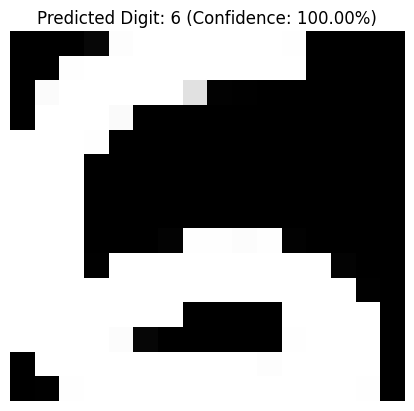

The predicted digit is: 6 with 100.00% confidence


In [83]:
def classify_digit(image_path, model, scaler):

    # Read image file
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resizes
    image_resized = cv2.resize(image, (16, 15))

    # Reshape to 1D array
    image_1D = image_resized.flatten().reshape(1, -1)

    # Normalize
    image_1D_normalized = scaler.transform(image_1D)

    # Prediction
    probabilities = model.predict_proba(image_1D_normalized)
    predicted_digit = np.argmax(probabilities)
    confidence = np.max(probabilities)

    # Display input image
    plt.imshow(image_resized, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit} (Confidence: {confidence * 100:.2f}%)')
    plt.axis('off')
    plt.show()

    return predicted_digit, confidence

image_path = 'new_images/5.jpg'
predicted_digit, confidence = classify_digit(image_path, mlp, scaler)
print(f"The predicted digit is: {predicted_digit} with {confidence * 100:.2f}% confidence")